In [3]:
import pandas as pd
import json, os 
import numpy as np
from collections import Counter

# Exploratory Data Analysis
## Importing the Dataset

In [4]:
data_dir = 'dataset'
businesses = []
# Read the data and save it to businesses list
with open(os.path.join(data_dir, 'business.json')) as f:
    for line in f:
        businesses.append(json.loads(line))
businesses[0]

{'address': '4855 E Warner Rd, Ste B9',
 'attributes': {'AcceptsInsurance': True,
  'BusinessAcceptsCreditCards': True,
  'ByAppointmentOnly': True},
 'business_id': 'FYWN1wneV18bWNgQjJ2GNg',
 'categories': ['Dentists',
  'General Dentistry',
  'Health & Medical',
  'Oral Surgeons',
  'Cosmetic Dentists',
  'Orthodontists'],
 'city': 'Ahwatukee',
 'hours': {'Friday': '7:30-17:00',
  'Monday': '7:30-17:00',
  'Thursday': '7:30-17:00',
  'Tuesday': '7:30-17:00',
  'Wednesday': '7:30-17:00'},
 'is_open': 1,
 'latitude': 33.3306902,
 'longitude': -111.9785992,
 'name': 'Dental by Design',
 'neighborhood': '',
 'postal_code': '85044',
 'review_count': 22,
 'stars': 4.0,
 'state': 'AZ'}

In [5]:
# Create different list to store the information extracted from the json object
business_id = []
address = []
categories = []
name = []
review_counts = []
stars = []
# Iterate throught the businesses and store the information into list
for business in businesses:
    business_id.append(business['business_id'])
    address.append(business['address'])
    categories.append(business['categories'])
    name.append(business['name'])
    review_counts.append(business['review_count'])
    stars.append(business['stars'])

## Data Process

In [6]:
print("Business Id has ", len(business_id))
print("Addresses has ", len(address))
print("Categories has ", len(categories))
print("Name has ", len(name))
print("Review count has ", len(review_counts))
print("Stars has ", len(stars))

Business Id has  174567
Addresses has  174567
Categories has  174567
Name has  174567
Review count has  174567
Stars has  174567


We have 174567 businesses. It will be time consuming to process all the data, so we will categorize the businesses into some representitive categories and analysis them by category.

In [7]:
# Create a dataframe to present the business table
df = pd.DataFrame({"Id": business_id, "Address": address, "Categories": categories, "Name": name, "Review_Count": review_counts, "Stars": stars})

In [8]:
df.head(5)

,Address,Categories,Id,Name,Review_Count,Stars
0,"4855 E Warner Rd, Ste B9","[Dentists, General Dentistry, Health & Medical...",FYWN1wneV18bWNgQjJ2GNg,Dental by Design,22,4.0
1,3101 Washington Rd,"[Hair Stylists, Hair Salons, Men's Hair Salons...",He-G7vWjzVUysIKrfNbPUQ,Stephen Szabo Salon,11,3.0
2,"6025 N 27th Ave, Ste 1","[Departments of Motor Vehicles, Public Service...",KQPW8lFf1y5BT2MxiSZ3QA,Western Motor Vehicle,18,1.5
3,"5000 Arizona Mills Cr, Ste 435","[Sporting Goods, Shopping]",8DShNS-LuFqpEWIp0HxijA,Sports Authority,9,3.0
4,581 Howe Ave,"[American (New), Nightlife, Bars, Sandwiches, ...",PfOCPjBrlQAnz__NXj9h_w,Brick House Tavern + Tap,116,3.5


We can see there are more than one categories of a business.

In [12]:
from collections import Counter
total_categories = []
# Iterate through the dataframe and store all the categories into a total category list
for categories in df['Categories']:
    total_categories.extend(categories)
len(total_categories)

667527

In [13]:
# Get How many Unique categories there is in the businesses's data
len(Counter(total_categories))

1293

We has 1293 categories in total. That's too much so we need to downsizing it to a reasonable number. Below shows the top 25 categories.

In [133]:
#Get the most common 25 categories and their number
categories_num = Counter(total_categories).most_common(25)

In [136]:
#Extract the category name from the (category, number) map and store them in list
list_Of_Categories = [category[0] for category in categories_num]

In [137]:
list_Of_Categories

['Restaurants',
 'Shopping',
 'Food',
 'Beauty & Spas',
 'Home Services',
 'Health & Medical',
 'Nightlife',
 'Local Services',
 'Automotive',
 'Bars',
 'Event Planning & Services',
 'Active Life',
 'Fashion',
 'Sandwiches',
 'Fast Food',
 'Hair Salons',
 'American (Traditional)',
 'Pizza',
 'Coffee & Tea',
 'Hotels & Travel',
 'Arts & Entertainment',
 'Home & Garden',
 'Auto Repair',
 'Doctors',
 'Professional Services']

There is some sub-categories in those top 25 categories, so we select some part of them to be more general categories for our data

In [140]:
# Select the sub-categories and store them in one list
bad_Categories = ['Food', 'Local Services', 'Automotive', 'Active Life', 'Sandwiches', 'Fast Food', 'Hair Salons', 'American (Traditional)', 'Pizza', 'Doctors', 'Professional Services']
# Go throught the top 25 categories and get rid of sub-categories 
good_Categories = [x for x in list_Of_Categories if x not in bad_Categories]

In [145]:
# Get the column of categories and store them into a list
list_Of_CategoriesData = df['Categories'].tolist()
# This is a method to go through the categories list to find those ones that contains certain category.
# For example, get all the businesses which category list contains "Restaurants"
def oneCategoryOfBuisnesses(Category, inCategory):
    for i in range(len(df)):
        if Category in list_Of_CategoriesData[i]:
            inCategory[i] = Category
    print("Businesses of Catogories are:")
    print(Counter(inCategory))
    return inCategory

Now we need to iterate the businesses and find the one general category this business belongs to. For those not included in the general categories we chose, it will be set to 'Others' category

In [147]:
# Create a none of list
inCategory = [None] * len(df)
# Go through the general categories list
# Apply each of them to the method to find those businesses which is in this category
for Category in good_Categories:
    temp = oneCategoryOfBuisnesses(Category, inCategory)
    inCategory = temp
print("Done!")

Businesses of Catogories are:
Counter({None: 119949, 'Restaurants': 54618})
Businesses of Catogories are:
Counter({None: 92361, 'Restaurants': 54235, 'Shopping': 27971})
Businesses of Catogories are:
Counter({None: 77556, 'Restaurants': 54187, 'Shopping': 25810, 'Beauty & Spas': 17014})
Businesses of Catogories are:
Counter({None: 63982, 'Restaurants': 54151, 'Shopping': 23262, 'Beauty & Spas': 16967, 'Home Services': 16205})
Businesses of Catogories are:
Counter({'Restaurants': 54124, None: 53559, 'Shopping': 22089, 'Home Services': 16156, 'Beauty & Spas': 14409, 'Health & Medical': 14230})
Businesses of Catogories are:
Counter({None: 49148, 'Restaurants': 46720, 'Shopping': 21812, 'Home Services': 16139, 'Beauty & Spas': 14375, 'Health & Medical': 14219, 'Nightlife': 12154})
Businesses of Catogories are:
Counter({None: 49148, 'Restaurants': 46720, 'Shopping': 21812, 'Home Services': 16139, 'Beauty & Spas': 14375, 'Health & Medical': 14219, 'Bars': 10563, 'Nightlife': 1591})
Businesse

This is the processing path of we selecting each category's businesses. In the end, there are still 31474 None values in our inCategory table which means 31474 records don't fit in our general category defined above. So we need to change the none value to "Others"

In [152]:
# Change the none value to "Others" in the inCategory list
inCategory = [catg if catg != None else 'Others' for catg in inCategory]

In [153]:
# A summary of inCategory list
Counter(inCategory)

Counter({'Arts & Entertainment': 5402,
         'Auto Repair': 5172,
         'Bars': 9091,
         'Beauty & Spas': 13903,
         'Coffee & Tea': 5806,
         'Event Planning & Services': 5047,
         'Fashion': 6379,
         'Health & Medical': 13976,
         'Home & Garden': 5344,
         'Home Services': 13805,
         'Hotels & Travel': 5322,
         'Nightlife': 674,
         'Others': 31474,
         'Restaurants': 42651,
         'Shopping': 10521})

This is a result showing the category distribution after we factered our data. still, restuarants is the most common category

In [154]:
# Add the list as one of the column in our business dataframe
df['inCategory'] = inCategory

Now we will look at the mean review count of businesses and their stars, to see if there is an relationship between the business rating and their review count

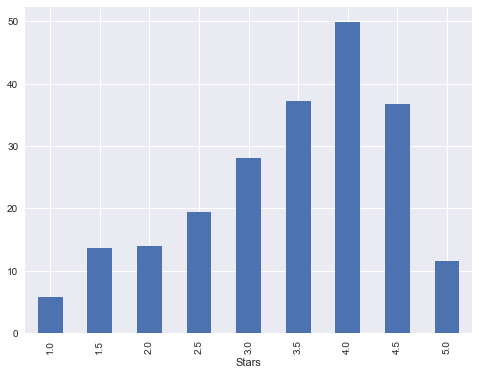

In [158]:
import matplotlib.pyplot as plt
# Plot the stars and mean of review count into a bar graph
fig = plt.figure(figsize=(8,6))
df.groupby('Stars').Review_Count.mean().plot.bar(ylim=0)
plt.show()

* 1/3 of our yelp business data are restaurants, the rest can be found in Health Medical, Beauty & Spa, Hotels & Travel, Shopping....
* From the graph we can see the average count of reviews has a positive relationship with the rating.
* With Higher total count of reviews, its more likely the restaurant has higher ratings, suggesting that the restaurant are more popular
* But with more people come and comment, it's not likely to keep a rating at 5 stars because it's hard to satisfy everyone

In [159]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

After seeing the general rating distribution, we now will plot the rating distribution by category to see if there is anything interesting behind categories

In [232]:
np.random.seed(sum(map(ord, "categorical")))
index = []
count = []
categ = []
# Iterate through all the categories we have
# Get the total count of different ratings under each category
for category in good_Categories:
    df2 = df[df['inCategory']==category]
    series = df2['Stars'].value_counts()
    index.extend(series.index)
    count.extend(series.values)
    temp = [category] * len(series.index)
    categ.extend(temp)

In [234]:
# Create a dataframe used for plotting.
# categ is for the business category
# index is for the corresponding stars
# count is the related stars' number
data_to_plot = pd.DataFrame({'inCategory': categ, 'Stars': index, 'Count': count})

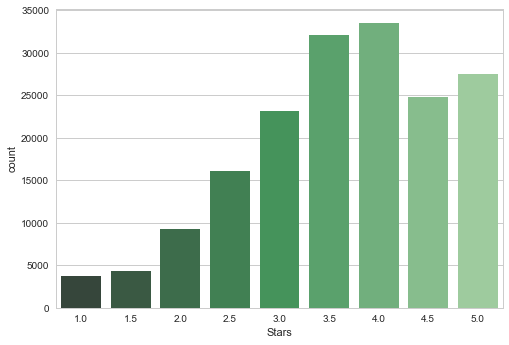

In [238]:
sns.countplot(x="Stars", data=df, palette="Greens_d");

* This is the general distribution of ratings in our dataset
* what's interesting is, we have more 5 stars businesses tha  4.5 stars busiesses,but the total review counts of 5 stars businesses are much lower than 4.5 stars.
* It means 5 stars businesses are more likely with fewer customers and haven't gone popular, so the rating is biased and may can't stand the marketing in long run

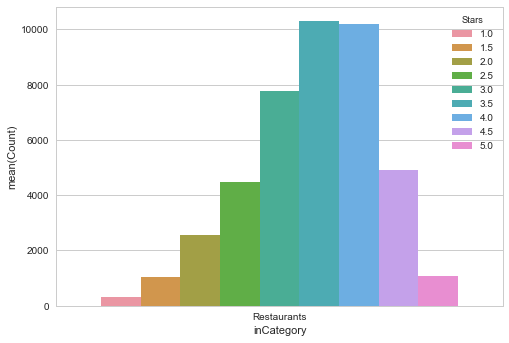

In [253]:
# Plot the restaurant stars distribution 
sns.barplot(x="inCategory", y="Count", hue="Stars", data=data_to_plot, order=["Restaurants"]);

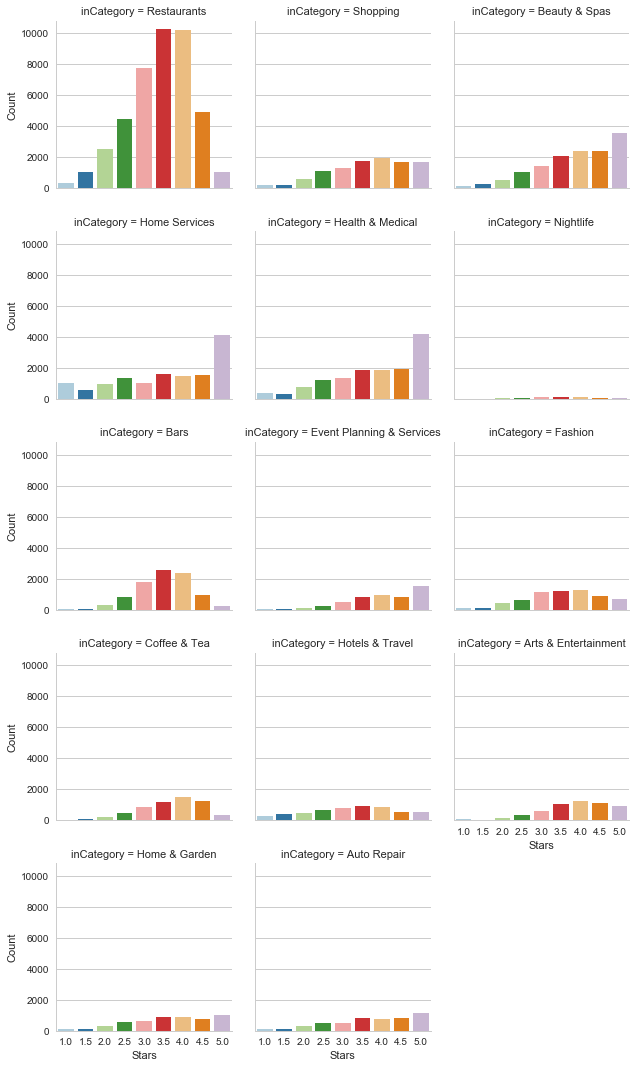

In [252]:
# Plot a grid graph to present the stars rating in different categories
g = sns.FacetGrid(data_to_plot, col_wrap=3, col="inCategory")
g.map(sns.barplot, "Stars", "Count", palette="Paired");

### This is the rating distribution of our 14 categories 
* The Restaurants rating distribution shows a almost norminal distribution, which is understandable consider restaurants reviews are more subjective. Everyone has their own taste.
* Bars and Coffe & Tea has the same kind of distribution with Restaurants, proves again the distribution would tend more norminal when the reviews are subjective.
* Health & Service shows more percentage of 5 stars as in Health Businesses are more objective.

# Load Review Data

In [19]:
data_dir = 'dataset'
reviews = []
# Read the reviews table 
with open(os.path.join(data_dir, 'review.json')) as f:
    for line in f:
        reviews.append(json.loads(line))
reviews[0]

{'business_id': '0W4lkclzZThpx3V65bVgig',
 'cool': 0,
 'date': '2016-05-28',
 'funny': 0,
 'review_id': 'v0i_UHJMo_hPBq9bxWvW4w',
 'stars': 5,
 'text': "Love the staff, love the meat, love the place. Prepare for a long line around lunch or dinner hours. \n\nThey ask you how you want you meat, lean or something maybe, I can't remember. Just say you don't want it too fatty. \n\nGet a half sour pickle and a hot pepper. Hand cut french fries too.",
 'useful': 0,
 'user_id': 'bv2nCi5Qv5vroFiqKGopiw'}

## Processing Reviews Data
* Because reviews are distinct for different kind of businesses, so we need to divide the reviews based on the business' category

In [21]:
text = []
bus_id = []
date = []
starOfReview = []
review_id = []
user_id = []
# Go through all the reviews json object
# Extract the data and stores them in a list
for review in reviews:
    bus_id.append(review['business_id'])
    text.append(review['text'])
    date.append(review['date'])
    review_id.append(review['review_id'])
    starOfReview.append(review['stars'])
    user_id.append(review['user_id'])

Since different businesses have different kind of features, to do better models for natural language processing and predict the rating, we will do the model by categories.

In [23]:
# Create a dataframe to store all the business information
reviews_data = pd.DataFrame({'Business_id': bus_id, 'Text': text, 'Date': date, 'Review Id': review_id, 'Stars': starOfReview, 'User Id': user_id})

This is a block of code where we extract all the restaurants' reviews. To map the restaurants and reviews, we need to get the category information from business table and use the business id to extract reviews from review table. Because our data is too big and there is a O(n) time complexity process, we failed to load in my machine so I took the code to another machine then load the data back.

In [62]:
# Get all the businesses' Id which category is 'Restaurants' from business dataframe
rid_list = df[df['inCategory'] == 'Restaurants']['business_id'].tolist()
is_Restuarants = [0] * len(reviews_data)
# Go throw all the reviews data
# Extract all the reviews who has a businsses id has appeared in restaurant businesses list.
for i in range(len(reviews_data)):
    if(i%10000 == 0 & i != 0):
        print("10000 processed")
    if reviews_data['Business_id'][i] in rid_list:
        is_Restuarants[i] = 1

KeyboardInterrupt: 

This is processed data for our restaurants' reviews.

In [69]:
# This machine is hard to do a so many find and storage work, 
# so we did the restaurant reviews extraction with the same code then use a csv to store it
rst_reviews = pd.read_csv("./myData/rst_reviews2.csv")

In [77]:
rst_reviews

,Unnamed: 0,Unnamed: 0.1,Business_id,Date,Review Id,Stars,Text,User Id,is_Restaurant
0,0,0,0W4lkclzZThpx3V65bVgig,2016-05-28,v0i_UHJMo_hPBq9bxWvW4w,5.0,"Love the staff, love the meat, love the place....",bv2nCi5Qv5vroFiqKGopiw,1
1,1,1,AEx2SYEUJmTxVVB18LlCwA,2016-05-28,vkVSCC7xljjrAI4UGfnKEQ,5.0,Super simple place but amazing nonetheless. It...,bv2nCi5Qv5vroFiqKGopiw,1
2,2,2,VR6GpWIda3SfvPC-lg9H3w,2016-05-28,n6QzIUObkYshz4dz2QRJTw,5.0,Small unassuming place that changes their menu...,bv2nCi5Qv5vroFiqKGopiw,1
3,3,3,CKC0-MOWMqoeWf6s-szl8g,2016-05-28,MV3CcKScW05u5LVfF6ok0g,5.0,Lester's is located in a beautiful neighborhoo...,bv2nCi5Qv5vroFiqKGopiw,1
4,4,4,ACFtxLv8pGrrxMm6EgjreA,2016-05-28,IXvOzsEMYtiJI0CARmj77Q,4.0,Love coming here. Yes the place always needs t...,bv2nCi5Qv5vroFiqKGopiw,1
5,5,5,s2I_Ni76bjJNK9yG60iD-Q,2016-05-28,L_9BTb55X0GDtThi6GlZ6w,4.0,Had their chocolate almond croissant and it wa...,bv2nCi5Qv5vroFiqKGopiw,1
6,7,7,9_CGhHMz8698M9-PkVf0CQ,2012-05-11,ymAUG8DZfQcFTBSOiaNN4w,4.0,Who would have guess that you would be able to...,u0LXt3Uea_GidxRW1xcsfg,1
7,9,9,5r6-G9C4YLbC7Ziz57l3rQ,2013-02-09,w41ZS9shepfO3uEyhXEWuQ,3.0,"Not bad!! Love that there is a gluten-free, ve...",u0LXt3Uea_GidxRW1xcsfg,1
8,11,11,z8oIoCT1cXz7gZP5GeU5OA,2013-05-01,PIsUSmvaUWB00qv5KTF1xA,4.0,This is currently my parents new favourite res...,u0LXt3Uea_GidxRW1xcsfg,1
9,12,12,XWTPNfskXoUL-Lf32wSk0Q,2011-09-28,PdZ_uFjbbkjtm3SCY_KrZw,3.0,Server was a little rude.\n\nOrdered the calam...,u0LXt3Uea_GidxRW1xcsfg,1


In [78]:
# Drop the unused coumns
rst_reviews = rst_reviews.drop(['Unnamed: 0.1'], axis = 1)

We are going to do prediction on review ratings, but we will create another column of binary classes in advance for future analysis

In [84]:
# Count the different value and number of reviews higher or lower than 3
Counter(rst_reviews['Stars'] > 3)

Counter({False: 1123404, True: 2098015})

In [91]:
# Use 3 as a boundary to create a table suggesting the positivity of this review
rst_reviews['Positivity'] = rst_reviews['Stars'] > 3
rst_reviews['Positivity'] = rst_reviews['Positivity']*1

In [111]:
import re
new_text = []
# Use regular expression to get rid of extra spaces and enter lines of reviews
for review in rst_reviews['Text']:
    new_text.append(re.sub('[^\w\s]', '', review))

In [113]:
# Drop the original data and use the cleaned and regulized text list as text data
rst_reviews.drop(['Text'], axis = 1)
rst_reviews['Text'] = new_text

So here is a summary of different review rating's total number. we have lots of 5 stars and 4 stars reviews. For faster processing, we divide the data into threee parts to do the machine learning. Let's take 1 Million as one batch.

In [123]:
# Split the reviews data into three parts, with 1000000 reviews as a batch
rst_reviews_part1 = rst_reviews[:1000000]
rst_reviews_part2 = rst_reviews[1000000:]
rst_reviews_part3 = rst_reviews_part2[1000000:]
rst_reviews_part2 = rst_reviews_part2[:1000000]
print("Part1: ", len(rst_reviews_part1))
print("Part2: ", len(rst_reviews_part2))
print("Part3: ", len(rst_reviews_part3))

Part1:  1000000
Part2:  1000000
Part3:  1221419


In [124]:
# Store the data for safety first
rst_reviews_part1.to_csv("rst_reviews_part1.csv")
print("Part1 Saved")
rst_reviews_part2.to_csv("rst_reviews_part2.csv")
print("Part2 Saved")
rst_reviews_part3.to_csv("rst_reviews_part3.csv")
print("Part3 Saved")

Part1 Saved
Part2 Saved
Part3 Saved


In [2]:
rst_reviews_part2 = pd.read_csv('rst_reviews_part2.csv')

In [3]:
rst_reviews_data = rst_reviews_part2[['Text', 'Stars']]

### Delete the punctuation and un-needed symbols 
for better processing the reviews' data, we need to get rid of the punctuations and extra spaces, then use a lower case to better creating the model

In [22]:
# Use only 10000 reviews to train as in our machine can't work all the data in short time
reviews_data2 = rst_reviews_data[:10000]
reviews_data2['Text'][0]

'Not sure whats wrong with this place and why its so difficult to get an order correct Ordered a burger and waited almost 20 minutes to get it whilst other people after me received their orders promptly I actually had to approach the counter ask for my order and was told they werent sure what happened to it They eventually gave me my order and were to busy to apologize for the mixup Last time I was there they forgot the cheese on the cheese burger Pathetic service and wont be returning'

We split the data into training data and testing data for future machine learning purpose

In [23]:
texts = reviews_data2['Text'].tolist()
X = []
# Lower the case of text so it will works better for feature extraction
for i in range(len(reviews_data2)):
    X.append(texts[i].lower())
# The stars will be used as labels
y = np.array(reviews_data2['Stars'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

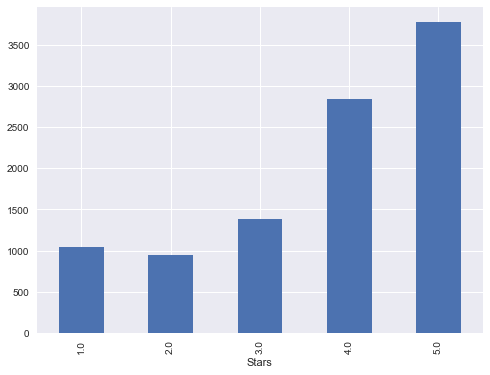

In [24]:
# Plot of the relationship between stars and reviews' count
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
reviews_data2.groupby('Stars').Text.count().plot.bar(ylim=0)
plt.show()

This is a plot of each stars' reviews number.

### User TF-IDF to do feature extraction for our model
By loading the text into vectorizer and selecting the n-gram parameter, we can get features for apply machine learning algorithms

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
# This is a tf-idf vectorizer, choose the parameters and fit to get the features
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(X).toarray()
labels = reviews_data2['Stars']
features.shape

(10000, 17318)

### Train a Multinomial Naive Bayes Model

In [26]:
# This code is adopted from source:
# https://www.slideshare.net/timruffles1/naturallanguage-processing-with-naive-bayes
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
# Use CountVectorizer and tfidf transformer to tramsform the data into vectors
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [27]:
print(clf.predict(count_vect.transform(["Not sure whats wrong with this place and why its so difficult to get an order correct Ordered a burger and waited almost 20 minutes to get it whilst other people after me received their orders promptly I actually had to approach the counter ask for my order and was told they werent sure what happened to it They eventually gave me my order and were to busy to apologize for the mixup Last time I was there they forgot the cheese on the cheese burger Pathetic service and wont be returning"])))

[5.]


### Train Random Forest, LinearSVC, Logistic Regression Model and plot the accuracy 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score

# Create a model list consists of different machine learning algorithms
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
# Iterate through the models to fit the data and do cross validation.
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
# Store the algorithms and accuracy information into a list
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

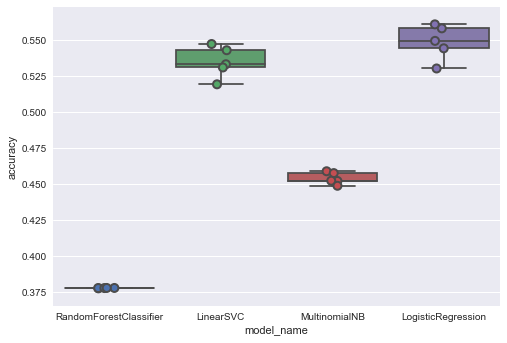

In [29]:
import seaborn as sns
# Plot the different model's accuracy distribution
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

From this code we can see the distribution of those 5 different model's accuracy.

In [30]:
# Calculate the mean project accuracy and compare
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.534999
LogisticRegression        0.548892
MultinomialNB             0.454097
RandomForestClassifier    0.377800
Name: accuracy, dtype: float64

For 5 classes classification, machine learning algorithms has low accuracy. But consider the original guess of review's rating is 25%, our machine actually did learn something from the term frequency and labels.
* Even with a TF-IDF to do feature extraction, Logistic Regression shows a Higher prediction accuracy compares to the other three algorithms

In [31]:
# This part is an exploration on Linear SVC model
# Which is refactored from the source:
# https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a
from sklearn.model_selection import train_test_split

model = LinearSVC()
# Split the data into training and testing data
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, reviews_data2.index, test_size=0.33, random_state=0)
# Fit the model
model.fit(X_train, y_train)
# Predict the results
y_pred = model.predict(X_test)

To better analysis the prediction, we look at the predicted value and the actual value distribution

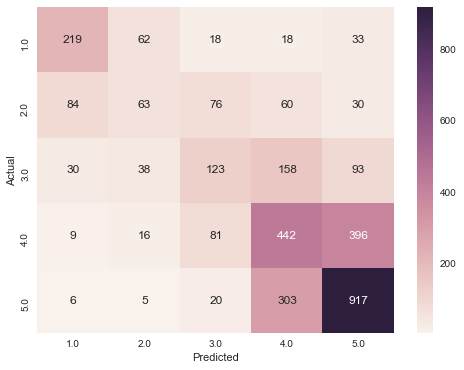

In [32]:
# Show the relationship between predicted value and its actual value
from sklearn.metrics import confusion_matrix
starsOfList = sorted(reviews_data2['Stars'].unique())
# Crate the matrix of tesing and prediction data
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
# Plot the data
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=starsOfList, yticklabels=starsOfList)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

* This shows the prediction and actual rating points of reviews of Linear SVC model
* We can see most of the false prdiction are the actual 4 stars predicted as 5 stars or 5 stars predicted as 4 stars. which is kind of hard to argue even from a human understanding.
* The accuracy prediction are mostly centered at 1 stars reviews and 5 stars reviews, which makes sense because those two kind of reviews are more extreme than others
* It would do better with binary classification.

### Use the SVC model to do One Vs Rest Classifier

After we got the idea that SVC will do better at binary classification, we now apply it to one vs rest classifier to see if it will improve the model.

In [59]:
#train test split
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
#feature engineering and model selection
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [60]:
# To make the program run faster, the reviews are gonna be top 100k reviews
reviews_data = rst_reviews_data[:100000]

#### Split the data into traing and testing data

In [61]:
texts = reviews_data['Text'].tolist()
X = []
# Change the text into lower case and also get the label for the reviews
for i in range(len(reviews_data)):
    X.append(texts[i].lower())
y = np.array(reviews_data['Stars'])
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

We use TD-IDF and CountVector to do the feature extraction and train the model

In [62]:
# Pipeline of feature engineering and model
# Use count vectorizer and tfidf to do the feature extraction
# Use the OneVsRest Classifier and LinearSVC to be the model
# Balanced means each Binary classifier's prediction will be equally important to the final results.
model = Pipeline([('vectorizer', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

#### Pre-fit the data to model to find the best parameters for count vectorizer gram range

In [63]:
#paramater selection
from sklearn.grid_search import GridSearchCV
parameters = {'vectorizer__ngram_range': [(1, 1), (1, 2),(2,2)],
               'tfidf__use_idf': (True, False)}
# pre-train and Find the perfect parameters for ngram range before our actual training.
gs_clf_svm = GridSearchCV(model, parameters, n_jobs=-1)
gs_clf_svm = gs_clf_svm.fit(X, y)
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

0.62024
{'tfidf__use_idf': False, 'vectorizer__ngram_range': (1, 2)}


The best ngram range for our data is (1, 2)

In [64]:
#preparing the final pipeline using the selected parameters
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', OneVsRestClassifier(LinearSVC(class_weight="balanced")))])

In [65]:
#fit model with training data
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
       ...lti_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1))])

In [66]:
#evaluation on test data
pred = model.predict(X_test)

In [67]:
# Apply the model to testing data to see the accuracy.
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(pred, y_test)
accuracy_score(y_test, pred)

0.6198333333333333

* By doing One Vs Rest classifer, the Linear SVC model has a much higher accuracy than before.
* But in general NLP doesn't show good results here because it's lack of consider of context and will not be better than deep learning. So we will explore further improvement in Deep Learning Area

The text in the document by <Xiajie Zhang> is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document by <Xiajie Zhang> is licensed under the MIT License https://opensource.org/licenses/MIT